In [1]:
# standard
import pandas as pd
import numpy as np
import os

# plots
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/home/ftitchenal/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read CSV into dataframe
ag_data = pd.read_csv('Agrofood_co2_emission.csv')

#Format column headers
ag_data.columns = ag_data.columns.str.replace(' ', '_')
ag_data.columns = ag_data.columns.str.replace('(', '', regex=True)
ag_data.columns = ag_data.columns.str.replace(')', '', regex=True)
ag_data.columns = map(str.lower, ag_data.columns)


ag_data.head()

,area,year,savanna_fires,forest_fires,crop_residues,rice_cultivation,drained_organic_soils_co2,pesticides_manufacturing,food_transport,forestland,...,manure_management,fires_in_organic_soils,fires_in_humid_tropical_forests,on-farm_energy_use,rural_population,urban_population,total_population_-_male,total_population_-_female,total_emission,average_temperature_°c
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


### General Info:

There are a total of 6965 data points and 31 features. 
</br>Data types appear to be accurate. 
</br>Some features have null values.

In [8]:
ag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             6965 non-null   object 
 1   year                             6965 non-null   int64  
 2   savanna_fires                    6934 non-null   float64
 3   forest_fires                     6872 non-null   float64
 4   crop_residues                    5576 non-null   float64
 5   rice_cultivation                 6965 non-null   float64
 6   drained_organic_soils_co2        6965 non-null   float64
 7   pesticides_manufacturing         6965 non-null   float64
 8   food_transport                   6965 non-null   float64
 9   forestland                       6472 non-null   float64
 10  net_forest_conversion            6472 non-null   float64
 11  food_household_consumption       6492 non-null   float64
 12  food_retail         

### Unique values:

There are 236 countries/territories included in the dataset.
</br>There are a total of 31 years reported (between 1990-2020).

In [9]:
#Find number of unique values
ag_data.nunique( )

area                                236
year                                 31
savanna_fires                      3746
forest_fires                       2962
crop_residues                      5358
rice_cultivation                   3635
drained_organic_soils_co2          2147
pesticides_manufacturing           1310
food_transport                     6512
forestland                          605
net_forest_conversion               442
food_household_consumption         6358
food_retail                        6459
on-farm_electricity_use            5322
food_packaging                     3704
agrifood_systems_waste_disposal    6419
food_processing                    3542
fertilizers_manufacturing          2973
ippu                               6026
manure_applied_to_soils            5927
manure_left_on_pasture             5922
manure_management                  5931
fires_in_organic_soils              126
fires_in_humid_tropical_forests    1736
on-farm_energy_use                 5558


### Duplicates: 

There are no dublicated rows

In [11]:
#Check for duplicate rows
ag_data.duplicated( ).sum()

0

### Aggregate and Plot Data:

In [37]:
#Aggregate data by year (average temperature change, total global emissions, total global urban population)
ag_data_yr = ag_data.groupby("year").agg({"average_temperature_°c": "mean", "total_emission": "sum", "urban_population": "sum"})

In [39]:
def standardize_df (df, features):
    """Standardize each column in a dataframe

    Args:
    df: Specified dataframe 
    features: Array of col names 

    Returns:
    standard_df: A copy of original Dataframe with all columns standardized
    """
    #Create empty dataframe
    standard_df = pd.DataFrame()
    
    #Apply standardization function to all columns in dataframe
    i = 0
    for col in features:
        mean = df.mean(axis=0)
        std_dev = df.std(axis=0)
        standard_df[col] = df[col].apply(lambda x: (x-mean[i])/std_dev[i])
        i += 1
    return standard_df

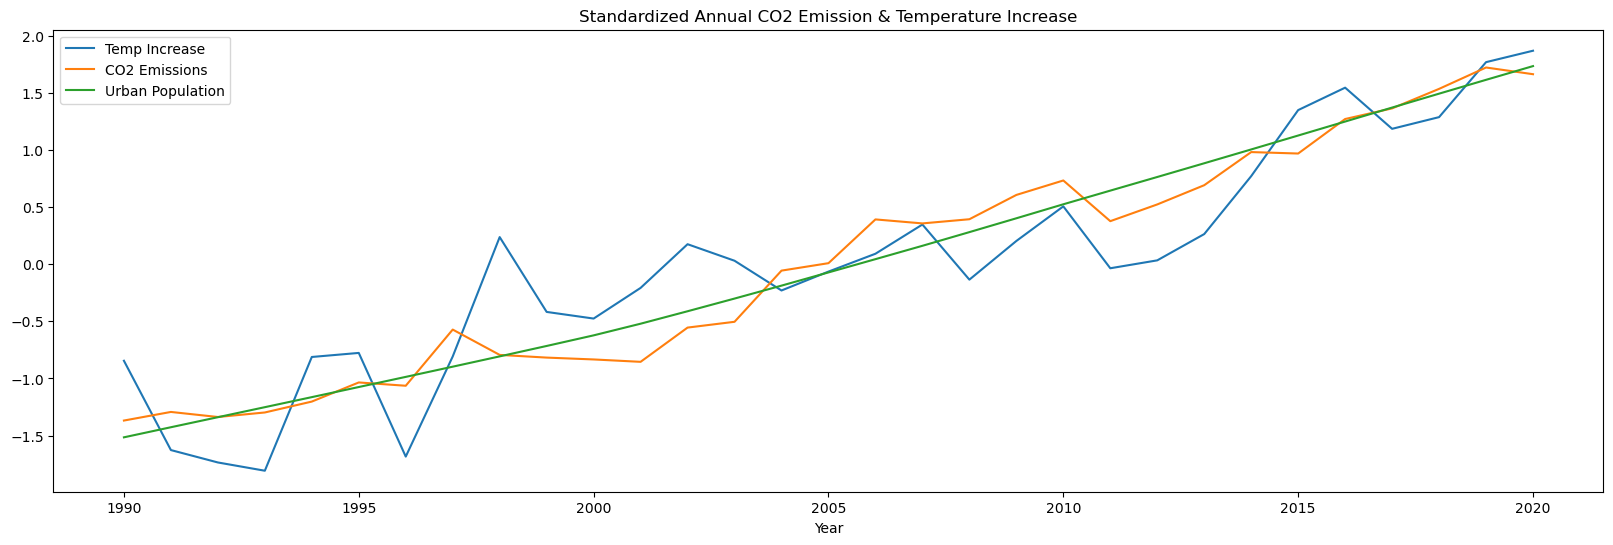

In [48]:
#Apply standard normalization to annual average temperature change, annual total global emissions, annual total urban population)
norm_ag_data_yr = standardize_df(ag_data_yr, ag_data_yr.columns)

norm_ag_data_yr.plot(figsize=(20, 6))
plt.title("Standardized Annual CO2 Emission & Temperature Increase")
plt.xlabel("Year")
plt.legend(['Temp Increase', 'CO2 Emissions', 'Urban Population'])
plt.show()